In [1]:
import os   #These two are useful modules
import sys

import numpy as np #Numerical Python

In [4]:
# Let's define te directory where you are with the "get current working directory" command...
corona_dir = os.getcwd()

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(corona_dir,"dati-andamento-nazionale")

#..and we can define some output directory with the results
results_dir = os.path.join(corona_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

In [6]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dpc-covid19-ita-andamento-nazionale.csv"

#we use the open command
data_file = open(os.path.join(data_dir, data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
data_lines = data_file.readlines()

#you can also run a for loop, writing for the first 10 lines, the line number, the length of each line and the line content 
for li in range(len(data_lines)):
    print(li,data_lines[li])

0 data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi

1 2020-02-24 18:00:00,ITA,101,26,127,94,221,221,1,7,229,4324

2 2020-02-25 18:00:00,ITA,114,35,150,162,311,90,1,10,322,8623

3 2020-02-26 18:00:00,ITA,128,36,164,221,385,74,3,12,400,9587

4 2020-02-27 18:00:00,ITA,248,56,304,284,588,203,45,17,650,12014

5 2020-02-28 18:00:00,ITA,345,64,409,412,821,233,46,21,888,15695

6 2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,50,29,1128,18661

7 2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,83,34,1694,21127

8 2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,149,52,2036,23345

9 2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,160,79,2502,25856

10 2020-03-04 18:00:00,ITA,1346,295,1641,1065,2706,443,276,107,3089,29837

11 2020-03-05 18:00:00,ITA,1790,351,2141,1155,3296,590,414,148,3858,32362

12 2020-03-06 18:00:00,ITA,2394,462,2856,1060,3916

In [7]:
# We can use the first line as header containing the column names.
# IMPORTANT NOTE: you can see that the variables are kept among code cells.

header = data_lines[0]

# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split(",")

print("header contains %d columns" % len(column_names))
print(column_names)

header contains 12 columns
['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_attualmente_positivi', 'nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi\n']


In [8]:
# Now we can create a dictionary of list for each column name, and fill it. 
# We will use an index for the column (ci) and one for the rows (ri)

#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]


#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(data_lines)):
    data_line = data_lines[ri].split(",")
    print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])
          

Processing row 1
Processing row 2
Processing row 3
Processing row 4
Processing row 5
Processing row 6
Processing row 7
Processing row 8
Processing row 9
Processing row 10
Processing row 11
Processing row 12
Processing row 13
Processing row 14
Processing row 15
Processing row 16
Processing row 17
Processing row 18
Processing row 19
Processing row 20
Processing row 21
Processing row 22
Processing row 23
Processing row 24


In [9]:
#print for example the numbers of people who are positive to the virus in time
print(data_dict["totale_attualmente_positivi"])    

['221', '311', '385', '588', '821', '1049', '1577', '1835', '2263', '2706', '3296', '3916', '5061', '6387', '7985', '8514', '10590', '12839', '14955', '17750', '20603', '23073', '26062', '28710']


In [10]:
#makes an int days vector from the data string vector
giorno=[]
positivi=[]
for gi in range(len(data_dict["data"])):
    positivi.append(int(data_dict["totale_attualmente_positivi"][gi]))
    if(int(data_dict["data"][gi][5:7])==2):
        giorno.append(int(data_dict["data"][gi][8:10])-23)
    if(int(data_dict["data"][gi][5:7])==3):
        giorno.append(int(data_dict["data"][gi][8:10])+6)
    
print(giorno)
print(positivi)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[221, 311, 385, 588, 821, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710]


[5.04110821e+04 2.26545710e-01 2.27279842e+01]
[[ 4.20412325e+06 -8.63601239e+00  7.20156433e+02]
 [-8.63601239e+00  2.10716364e-05 -1.52088638e-03]
 [ 7.20156433e+02 -1.52088638e-03  1.24628859e-01]]


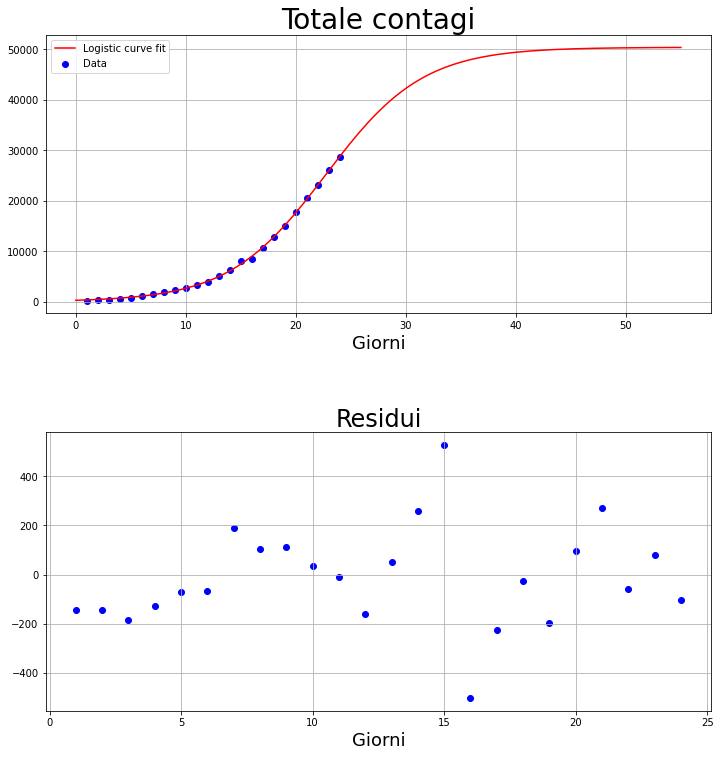

In [12]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


#defining the fit function
def fit_function(x, a, b, c):
    return a/(1+np.exp(-b*(x-c)))

initial_values=(54000, 0.2, 25)
pars, covm = curve_fit(fit_function, giorno, positivi, initial_values)

x=np.linspace(0,55,140)
print(pars)
y=pars[0]/(1+np.exp(-pars[1]*(x-pars[2])))
res=positivi-pars[0]/(1+np.exp(-pars[1]*(giorno-pars[2])))
print(covm)

plt.figure(figsize=[12,12])
plt.subplot(211)
plt.plot(x,y,marker="",color="red",label='Logistic curve fit')
plt.scatter(giorno,positivi,marker="o",color="blue",label='Data')
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.legend()
plt.title('Totale contagi',fontsize=28)
plt.tight_layout(pad=8.0)
plt.subplot(212)
plt.scatter(giorno,res,marker="o",color="blue")
plt.xlabel("Giorni",fontsize=18)
plt.grid()
plt.title('Residui',fontsize=24)
plt.savefig('contagi_e_residui.png')
plt.show()
